### Convolutional Neural Network

This activity focuses on using a basic convolutional architecture to predict the handwritten digits data.  Your goal is to again use the preprocessing tools of `keras` to prepare the data.  Next, you will use the `Conv2D` and `MaxPool2D` layers to create the feature maps of digits.   Finally, you will flatten the resulting feature maps and pass them through a convential dense architecture.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf

[Back to top](#-Index)

### Problem 1

#### Loading the Data

Below, import and load the `mnist` data from `keras`.  Reshape the data in anticipation of the Convolutional Layers -- `(num_observations, 28, 28, 1)`.  Create an `ImageDataGenerator` object `gen` with `rescale = 1/255.`.  Convert the target variable, and use the reshaped and dummied objects with your generator to create both a `train_gen` and `test_gen` objects with the `.flow()` function.

In [2]:
### GRADED
tf.random.set_seed(42)
(x_train, y_train), (x_test, y_test) = ('', ''), ('', '')
X_train = ''
X_test = ''
gen = ''
Y_train = ''
Y_test = ''
train_gen = ''
test_gen = ''
    
### BEGIN SOLUTION
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = x_train.reshape(60_000, 28, 28, 1)
X_test = x_test.reshape(10_000, 28, 28, 1)
gen = ImageDataGenerator(rescale=1/255.)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
train_gen = gen.flow(X_train, Y_train)
test_gen = gen.flow(X_test, Y_test)
### END SOLUTION

### ANSWER CHECK
print(train_gen)
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [3]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist
(x_train_, y_train_), (x_test_, y_test_) = mnist.load_data()
X_train_ = x_train_.reshape(60_000, 28, 28, 1)
X_test_ = x_test_.reshape(10_000, 28, 28, 1)
gen_ = ImageDataGenerator(rescale=1/255.)
Y_train_ = to_categorical(y_train_)
Y_test_ = to_categorical(y_test_)
train_gen_ = gen.flow(X_train_, Y_train_)
test_gen_ = gen.flow(X_test_, Y_test_)
#
#
#
assert X_train_.shape == X_train.shape
assert Y_train_.shape == Y_train.shape
np.testing.assert_array_equal(train_gen.x, train_gen_.x)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Constructing the Convolutional Layers

Below, create a network named `conv_model` using the following architecture:

- One `Conv2D` layer with 16 filters size 3 x 3 with `relu` activation
- One `MaxPool2D` layer with pool size 2 x 2
- One `Flatten` layer to flatten the results of pooling
- One `Dense` layer with 100 nodes and `relu` activation
- One `Dense` output layer with `softmax` activation

Compile your model appropriately with `accuracy` as your metric.

In [4]:
### GRADED
tf.random.set_seed(42)
conv_model = ''

    
### BEGIN SOLUTION
tf.random.set_seed(42)
conv_model = Sequential([Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'),
                   MaxPool2D(pool_size = (2, 2)),
                   Flatten(),
                   Dense(100, activation = 'relu'),
                   Dense(10, activation = 'softmax')])
conv_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
### END SOLUTION

### ANSWER CHECK
# conv_model.build(input_shape = (X_train.shape[0], 28, 28, 1))
# conv_model.summary()

In [5]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
conv_model_ = Sequential([Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'),
                   MaxPool2D(pool_size = (2, 2)),
                   Flatten(),
                   Dense(100, activation = 'relu'),
                   Dense(10, activation = 'softmax')])
conv_model_.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

#
#
#
assert conv_model.layers[0].filters == conv_model_.layers[0].filters
assert conv_model.layers[0].kernel_size == conv_model_.layers[0].kernel_size
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Examining the Training

Use the `conv_model` to fit the training data using 20 epochs with `verbose = 0`. Assign the results to `history` and uncomment the code to visualize the resulting fit accuracies.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

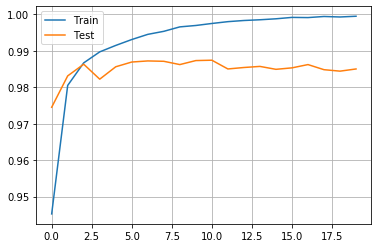

In [6]:
### GRADED
tf.random.set_seed(42)
history = ''

    
### BEGIN SOLUTION
tf.random.set_seed(42)
history = conv_model.fit(train_gen, validation_data=test_gen, epochs=20, verbose = 0)
### END SOLUTION

### ANSWER CHECK
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.grid()
plt.legend();

In [19]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
history_ = conv_model_.fit(train_gen_, validation_data=test_gen_, epochs=20, verbose = 0)

#
#
#
assert round(history.history['accuracy'][-1], 2) == round(history_.history['accuracy'][-1], 2)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Predicting with a New Image

To predict the value of a given digit use the `.predict` function and reshape the input to `(num_observations, 28, 28, 1)` to make predictions for the first five digits in the test data, given as `test_images` below. 


1/1 [==============================] - 0s 26ms/step
[7 2 1 0 4]


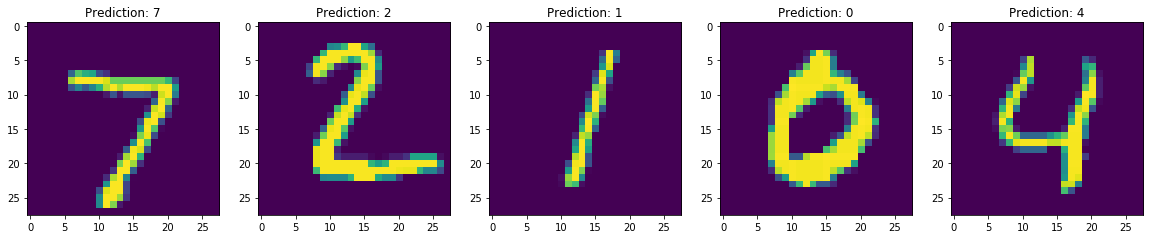

In [16]:
### GRADED
tf.random.set_seed(42)
test_images = X_test[:5]
preds = ''

    
### BEGIN SOLUTION
tf.random.set_seed(42)
test_images_shaped = test_images.reshape(5, 28, 28, 1)
preds = np.argmax(conv_model.predict(test_images_shaped), axis = 1)
### END SOLUTION

### ANSWER CHECK
print(preds)
# fig, ax = plt.subplots(1, 5, figsize = (20, 4))
# for i, im in enumerate(test_images):
#     ax[i].imshow(im.reshape(28, 28))
#     ax[i].set_title(f'Prediction: {preds[i]}')

In [18]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
test_images_shaped_ = test_images.reshape(5, 28, 28, 1)
preds_ = np.argmax(conv_model_.predict(test_images_shaped_), axis = 1)#
#
#
np.testing.assert_array_equal(preds, preds_)
### END HIDDEN TESTS

1/1 [==============================] - 0s 25ms/step
